# Grok experiment 2 exploratory analysis
The purpose of this notebook is to perform some exploratory analysis of the 2nd grokking experiment.

## Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Load the dictionary from the JSON file
with open('near_perfect_grok_counts.json', 'r') as f:
    perfect_grok_counts = json.load(f)

# Convert the string keys back to the original types (float and None)
converted_grok_counts = {}
for str_alpha, alpha_dict in perfect_grok_counts.items():
    alpha = float(str_alpha)
    converted_grok_counts[alpha] = {}
    
    for str_grok_label, grok_label_dict in alpha_dict.items():
        grok_label = None if str_grok_label == 'None' else int(str_grok_label)
        converted_grok_counts[alpha][grok_label] = {int(k): v for k, v in grok_label_dict.items()}

## What dynamics perfectly grok?
I want to make a 6 pannel plot. The top row will have alpha=0.1 and the bottom row will have alpha=1.0. The left column will have experiments that grokked from both labels. The middle column will have experiments that grokked from the positive label. The right column will have experiments that grokked from the negative label. In each pannel, I want the x-axis to be number of patterns grokked and I want the y-axis to be the number of trials that achieved perfect grokking accuracy (1.0). Retrieve perfect grokking accuracy from the metrics history by querying for the highest grokking accuracy.

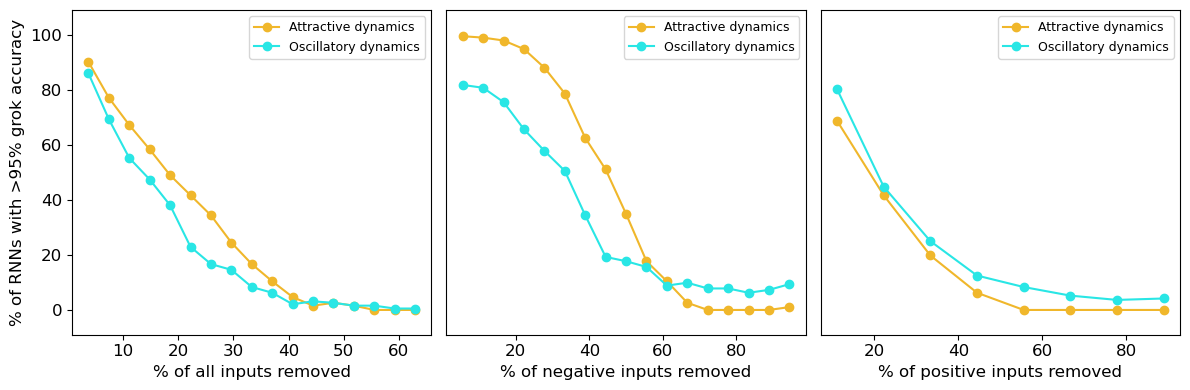

In [3]:
# Given Colors and Constants
color_attractive = "#F0B72B"  # alpha=0.1
color_oscillatory = "#29E6E5"  # alpha=1.0
total_trials = 192
total_inputs = 27
total_positive_labels = 9
total_negative_labels = 18

# Create the 3-panel plot, 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns
fontsize = 12  # Given Font Size

# Plotting Logic
for j, grok_label in enumerate([None, -1, 1]):
    ax = axs[j]
    
    for alpha, color, label in zip([0.1, 1.0], [color_attractive, color_oscillatory], ['Attractive dynamics', 'Oscillatory dynamics']):
        data = converted_grok_counts[alpha].get(grok_label, {})
        x, y = zip(*sorted(data.items()))
        
        # Convert x and y to percentage and plot
        total_labels = total_negative_labels if grok_label == -1 else (total_positive_labels if grok_label == 1 else total_inputs)
        x_percent = [((val / total_labels) * 100) for val in x]
        y_percent = [((val / total_trials) * 100) for val in y]
        
        ax.plot(x_percent, y_percent, color=color, marker='o', linestyle='-', label=label)

     # Remove titles
    ax.set_title("")
    # Modify X-Axis Labels
    xlabel = '% of all inputs removed' if grok_label is None else ('% of negative inputs removed' if grok_label == -1 else '% of positive inputs removed')
    ax.set_xlabel(xlabel, fontsize=fontsize)  # Set font size for X Axis label
    
    # Set the font size for Y Axis label and Y Axis ticks
    if j == 0:  # only the first plot
        ax.set_ylabel('% of RNNs with >95% grok accuracy', fontsize=fontsize)
        ax.tick_params(axis='y', labelsize=fontsize)

    ax.tick_params(axis='x', labelsize=fontsize)  # Set font size for X Axis ticks

    # Set the range for Y Axis and remove ticks and labels for middle and right plots
    ax.set_ylim(-9, 109)
    if j != 0:  # middle and right plots
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_ylabel('')

# Apply legend with fontsize
axs[0].legend(fontsize=9)
axs[1].legend(fontsize=9)
axs[2].legend(fontsize=9)

plt.tight_layout()
plt.savefig("grokking_experiment.png")
plt.show()